要让二维高斯的等值线呈现十字状，可以对其进行一定的变换或修改。高斯分布的等值线通常是圆形，因为它的方程是基于到中心点的欧氏距离。为了改变其等值线形状，可以考虑以下几种方法：

### 1. 使用非等方的高斯分布
将高斯分布从标准的同方差分布变成具有不同方差的分布，例如通过变换使其在 $x$ 和 $y$ 方向上衰减不同。可以采用以下方程：

$$
f(x, y) = \exp\left(-\frac{x^2}{2\sigma_x^2} - \frac{y^2}{2\sigma_y^2}\right)
$$

在这种情况下，如果让 $\sigma_x$ 和 $\sigma_y$ 差别极大，等值线会呈现椭圆形。然而，这种方式只能让等值线呈现拉伸，而无法直接得到十字形。

### 2. 加入方向性项，产生“十字形”衰减
可以考虑通过增加方向性调制项来改变分布的形状。例如，通过在高斯分布中加入一个正弦函数，使得衰减随着方向变化：

$$
f(x, y) = \exp\left(-\frac{x^2 + y^2}{2\sigma^2}\right) \cdot \left(1 + \cos(k \cdot \text{atan2}(y, x))\right)
$$

其中，$\text{atan2}(y, x)$ 是 $x$ 轴正方向与点 $(x, y)$ 连线之间的夹角，而 $k$ 可以控制“十字形”或“星形”的边数。当 $k = 4$ 时，等值线会形成类似十字的形状。这个公式的效果是让高斯的衰减沿不同方向发生不同的变化。

### 3. 使用双峰高斯分布叠加
通过在四个方向上叠加四个偏移的高斯分布也能产生十字形状。可以让四个高斯分布的中心偏离原点，例如：

$$
f(x, y) = \exp\left(-\frac{(x - d)^2 + y^2}{2\sigma^2}\right) + \exp\left(-\frac{(x + d)^2 + y^2}{2\sigma^2}\right) + \exp\left(-\frac{x^2 + (y - d)^2}{2\sigma^2}\right) + \exp\left(-\frac{x^2 + (y + d)^2}{2\sigma^2}\right)
$$

这里 $d$ 表示偏移量。通过选择合适的 $d$ 和 $\sigma$ 值，叠加的结果可以形成类似十字形的等值线结构。

### 4. 引入切比雪夫距离
标准高斯使用的是欧氏距离（即 $ \sqrt{x^2 + y^2} $），如果将其改为切比雪夫距离（Chebyshev Distance），即 $\max(|x|, |y|)$，则会得到一个“菱形”的等值线结构，类似于十字形的外形：

$$
f(x, y) = \exp\left(-\frac{\max(|x|, |y|)}{2\sigma^2}\right)
$$

这种方式会导致等值线呈现方形或菱形效果。

### 三维高斯分布的可视化
接下来拓展到三维。


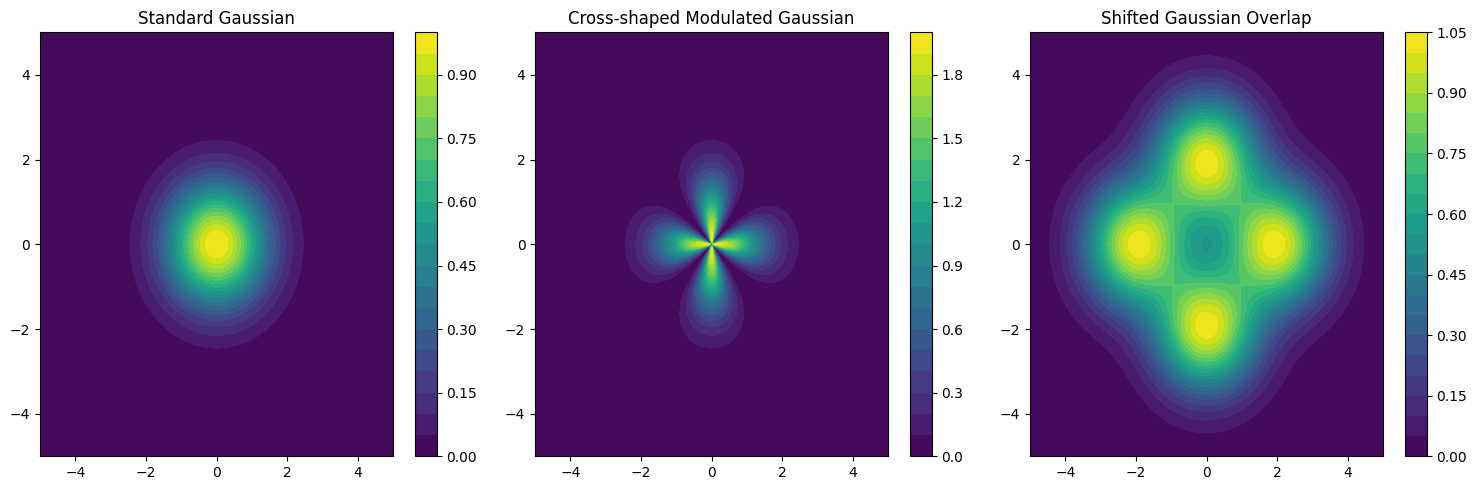

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 定义网格
x = np.linspace(-5, 5, 500)
y = np.linspace(-5, 5, 500)
X, Y = np.meshgrid(x, y)

# 1. 标准高斯分布 (用于比较)
Z_gaussian = np.exp(-(X**2 + Y**2) / (2 * 1**2))

# 2. 带方向性的高斯分布，添加十字形调制
k = 4  # 控制"十字形"的边数
Z_cross = np.exp(-(X**2 + Y**2) / (2 * 1**2)) * (1 + np.cos(k * np.arctan2(Y, X)))

# 3. 四个偏移的高斯分布叠加
d = 2  # 偏移量
Z_shifted = (
    np.exp(-((X - d)**2 + Y**2) / (2 * 1**2)) +
    np.exp(-((X + d)**2 + Y**2) / (2 * 1**2)) +
    np.exp(-(X**2 + (Y - d)**2) / (2 * 1**2)) +
    np.exp(-(X**2 + (Y + d)**2) / (2 * 1**2))
)

# 绘图
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# 标准高斯等值线
contour1 = axs[0].contourf(X, Y, Z_gaussian, levels=20, cmap='viridis')
axs[0].set_title("Standard Gaussian")
fig.colorbar(contour1, ax=axs[0])

# 十字形方向性高斯等值线
contour2 = axs[1].contourf(X, Y, Z_cross, levels=20, cmap='viridis')
axs[1].set_title("Cross-shaped Modulated Gaussian")
fig.colorbar(contour2, ax=axs[1])

# 偏移高斯叠加等值线
contour3 = axs[2].contourf(X, Y, Z_shifted, levels=20, cmap='viridis')
axs[2].set_title("Shifted Gaussian Overlap")
fig.colorbar(contour3, ax=axs[2])

plt.tight_layout()
plt.show()


等值面提取失败，level=1.0
[[0.267004 0.004874 0.329415]
 [0.267004 0.004874 0.329415]
 [0.267004 0.004874 0.329415]
 ...
 [0.709898 0.868751 0.169257]
 [0.709898 0.868751 0.169257]
 [0.709898 0.868751 0.169257]]


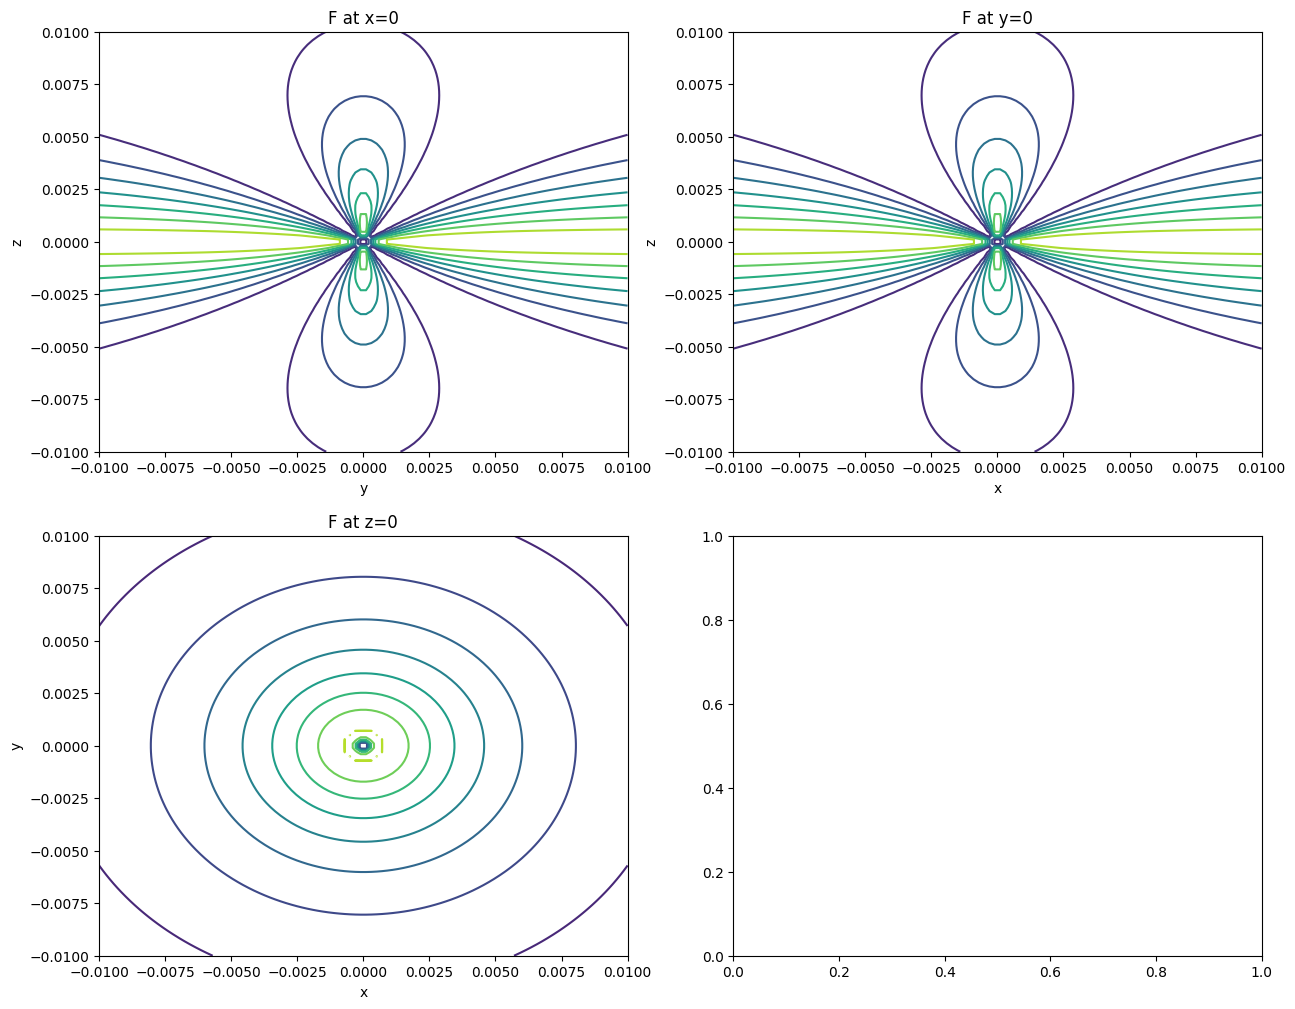

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import marching_cubes, mesh_surface_area
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from vis_field import *


def cross3d_function(X, Y, Z, sigma_x=1.0, sigma_z=1, k=4):
    """
    计算三维函数 F(x, y, z) 的值。
    :param X: 网格中的 X 坐标数组
    :param Y: 网格中的 Y 坐标数组
    :param Z: 网格中的 Z 坐标数组
    :param sigma_x: 控制径向衰减的参数
    :param sigma_z: 控制 z 方向衰减的参数
    :param k: 控制十字形的边数
    :return: 三维数组，表示 F 的值
    """
    R = np.sqrt(X**2 + Y**2)  # 径向距离
    theta = np.arctan2(Z, np.sqrt(X**2 + Y**2))  # 极角
    F = np.exp(-R / (2 * sigma_x**2)) * (1 + np.cos(k * theta)) * np.exp(-Z**2 / (2 * sigma_z**2))
    return F

def dipole_field(X,Y,Z,center=[0,0,0],n=[0,0,1],c=1,eps = 1e-5):
    x = X.flatten()
    y = Y.flatten()
    z = Z.flatten()
    N = np.repeat(np.array(n).reshape(1,3),x.shape[0],axis=0)
    R = np.array([x,y,z]).T
    R = R - center
    print(R.shape,N.shape)
    F = -1 * (3 * np.sum(R * N, axis=-1)[:,None] * R - N) 
    F = F / (np.linalg.norm(F,axis=-1)[:,None] + eps)**3
    F = F.T
    F = np.linalg.norm(F,axis=0)
    # normalize
    assert np.isnan(F).any() == False
    assert np.isinf(F).any() == False
    # F = F / np.max(F)
    F = F.reshape(X.shape)    
    return F


#  # 定义网格
l = -0.01
r = -1*l
x = np.linspace(l, r, 100)
y = np.linspace(l, r, 100)
z = np.linspace(l, r, 100)
# X, Y, Z = np.meshgrid(x, y, z)
# print(X.shape,Y.shape,Z.shape)
# # 计算 F
func = cross3d_function
sigmaz = 1
sigmax = 0.05
paramliazed_func = lambda X,Y,Z: func(X,Y,Z,sigma_z=sigmaz,sigma_x=sigmax,k=4)

# func = dipole_field
# paramliazed_func = lambda X,Y,Z: func(X,Y,Z,center=[0,0,0],n=[0,0,1],c=1,eps = 1e-5)

os.makedirs("temp/vis_field",exist_ok=True)
draw_F(paramliazed_func,filename="temp/vis_field/"+ func.__name__ + ".ply",x=x,y=y,z=z)
plot_F(paramliazed_func,x=x,y=y,z=z)

